In [3]:
 #Importar las librerias que vamos a utilizar

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt



In [4]:
#Leer en la data

dataframe = pd.read_csv('./movies.csv')

In [5]:
#Vamos a ver la data

dataframe.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [6]:
#Ver si tenemos data faltante 


for col in dataframe.columns:
    pct_missing = np.mean(dataframe[col].isnull()) #Calcular la media.Ver si hay nulos.
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [7]:
#eliminar los valores nulos del DataFrame

dataframe = dataframe.dropna()

In [8]:
#Revisar si se eliminaron correctamente 

for col in dataframe.columns:
    pct_missing = np.mean(dataframe[col].isnull()) #Calcular la media.Ver si hay nulos.
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [9]:
#Revisar el tipo de datos de cada columna 

print(dataframe.dtypes)


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [18]:
#Cambiar el tipo de dato de gross y budget. Se elimina el .0 que sobra


dataframe['budget'] = dataframe['budget'].astype('int64')

dataframe['gross'] = dataframe['gross'].astype('int64')

In [19]:
#Chequear que el cambio está bien

dataframe

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020


In [12]:
#Sacar el año de la columna released
#La columna year parece estar incorrecta


dataframe['yearcorrect'] = dataframe['released'].astype(str).str.split(', ').str[-1].astype(str).str[:4]


In [13]:
dataframe.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [14]:
#Descarga de los datos limpios 

dataframe.to_csv('movieclean.csv')

In [16]:
#Ordenar la data para ver las películas más taquilleras y menos taquilleras

dataframe.sort_values(by=['gross'], ascending=False)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


In [34]:
#Calcular el margen de beneficio

dataframe['ganancianeta'] = dataframe['gross']-dataframe['budget']
dataframe['profitmargin'] = dataframe['ganancianeta']/dataframe['gross']*100
dataframe['profitmargin'] = dataframe['profitmargin'].round(decimals=2)

In [35]:
dataframe.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,ganancianeta,profitmargin
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980,27998772,59.57
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980,54353106,92.35
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980,520375067,96.66
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980,79953539,95.81
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980,33846344,84.94


In [36]:
#Ordenar por mayor margen de beneficio 

dataframe.sort_values(by=['profitmargin'], ascending=False)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,ganancianeta,profitmargin
5114,Paranormal Activity,R,Horror,2007,"October 16, 2009 (United States)",6.3,225000.0,Oren Peli,Oren Peli,Katie Featherston,United States,15000,193355800,Solana Films,86.0,2009,193340800,99.99
3459,The Blair Witch Project,R,Horror,1999,"July 30, 1999 (United States)",6.5,239000.0,Daniel Myrick,Daniel Myrick,Heather Donahue,United States,60000,248639099,Haxan Films,81.0,1999,248579099,99.98
6815,The Gallows,R,Horror,2015,"July 10, 2015 (United States)",4.3,20000.0,Travis Cluff,Chris Lofing,Reese Mishler,United States,100000,42964410,New Line Cinema,81.0,2015,42864410,99.77
2093,El Mariachi,R,Action,1992,"February 26, 1993 (United States)",6.9,64000.0,Robert Rodriguez,Robert Rodriguez,Carlos Gallardo,Mexico,7000,2040920,Columbia Pictures,81.0,1993,2033920,99.66
5154,Once,R,Drama,2007,"June 15, 2007 (United States)",7.8,112000.0,John Carney,John Carney,Glen Hansard,Ireland,150000,20936722,Bórd Scannán na hÉireann,86.0,2007,20786722,99.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,Savior,R,Drama,1998,"November 20, 1998 (United States)",7.3,11000.0,Predrag Antonijevic,Robert Orr,Dennis Quaid,United States,10000000,14328,Initial Entertainment Group (IEG),103.0,1998,-9985672,-69693.41
1898,The Lovers on the Bridge,R,Drama,1991,"July 2, 1999 (United States)",7.6,13000.0,Leos Carax,Leos Carax,Juliette Binoche,France,28000000,29679,Films A2,125.0,1999,-27970321,-94242.80
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994,-4997030,-168250.17
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001,-4997446,-195671.34


In [37]:
#Descargar para llevar a tableau

dataframe.to_csv('movieclean2.csv')

In [15]:
# Ver las 10 compañías con las mayores recaudaciones

gananciacompaniasuma = dataframe.groupby('company')[["gross"]].sum()

gananciacompaniaorden = gananciacompaniasuma.sort_values('gross', ascending = False)[:10]

gananciacompaniatipo = gananciacompaniaorden['gross'].astype('int64') 

gananciacompaniatipo

company
Warner Bros.             54610959970
Universal Pictures       51241105418
Columbia Pictures        42356430218
Paramount Pictures       40021704691
Twentieth Century Fox    39542573303
Walt Disney Pictures     35833650748
New Line Cinema          19612851164
Marvel Studios           15065592411
DreamWorks Animation     11873612858
Dreamworks Pictures      11593807697
Name: gross, dtype: int64

In [17]:
# Ver los dos generos con más recaudación

gananciagenerosuma = dataframe.groupby('genre')[["gross"]].sum()

gananciageneroorden = gananciagenerosuma.sort_values('gross', ascending = False)[:2]

gananciagenerotipo = gananciageneroorden['gross'].astype('int64') 

gananciagenerotipo

genre
Action    237752868767
Comedy     88514817620
Name: gross, dtype: int64

In [36]:
#Cuánto ha recaudado el género de drama

filtro1 = dataframe["genre"] == "Drama"
dataframe[filtro1]

dataframe[filtro1]["gross"].sum()

52098564769

In [18]:
#Ver el director con mayor recaudación en taquilla

gananciadirectorsuma = dataframe.groupby('director')[["gross"]].sum()

gananciadirectororden = gananciadirectorsuma.sort_values('gross', ascending = False)[:5]

gananciadirectortipo = gananciadirectororden['gross'].astype('int64') 

gananciadirectortipo

#Steven Spielberg es el director con mayor recaudación en taquilla 
#Anthony Russo tiene las dos películas de Advengers más taquilleras
#James Cameron tiene dos películas en el top 5 de las más taquilleras y no es el director con mayor recaudación en taquilla

director
Steven Spielberg    9629049370
Anthony Russo       6844248984
Peter Jackson       6618045788
Michael Bay         6451692798
James Cameron       6248088578
Name: gross, dtype: int64

In [19]:
#Ver el star con mayor recaudación en taquilla

gananciastarsuma = dataframe.groupby('star')[["gross"]].sum()

gananciastarorden = gananciastarsuma.sort_values('gross', ascending = False)[:20]

gananciastartipo = gananciastarorden['gross'].astype('int64') 

gananciastartipo

#Solo dos mujeres en la lista de las 20 estrellas más taquilleras
#¿Cuál es el criterio de star que usa esta base de datos?

star
Robert Downey Jr.        11855937746
Tom Hanks                 9899944903
Tom Cruise                9440309875
Will Smith                7947279234
Johnny Depp               7410125354
Daniel Radcliffe          6971268037
Leonardo DiCaprio         6963367648
Vin Diesel                6036312568
Dwayne Johnson            5711270624
Bruce Willis              5318951036
Chris Pratt               5278456138
Ben Stiller               5246015011
Adam Sandler              4949566857
Harrison Ford             4897078169
Daisy Ridley              4480695234
Jim Carrey                4463262636
Mark Wahlberg             4326733851
Sandra Bullock            4245823325
Arnold Schwarzenegger     4196938072
Nicolas Cage              4159282504
Name: gross, dtype: int64

In [20]:
#Ver el escritor con mayor recaudación en taquilla 

gananciawritersuma = dataframe.groupby('writer')[["gross"]].sum()

gananciawriterorden = gananciawritersuma.sort_values('gross', ascending = False)[:5]

gananciawritertipo = gananciawriterorden['gross'].astype('int64') 

gananciawritertipo

writer
Christopher Markus    7587181621
James Cameron         6282146001
John Lasseter         4656539205
Chris Morgan          4360332296
J.K. Rowling          4152832057
Name: gross, dtype: int64

<AxesSubplot:title={'center':'Presupuesto vs ganancias'}, xlabel='budget', ylabel='gross'>

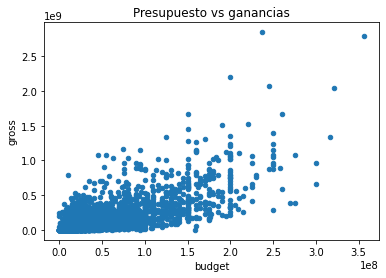

In [21]:
#Scatterplot para conseguir la relación (correlación) entre presupuesto y recaudación en taquilla

dataframe.plot.scatter(x='budget', y='gross',  title="Presupuesto vs ganancias")


[Text(0.5, 1.0, 'Correlación'),
 Text(0.5, 0, 'presupuesto'),
 Text(0, 0.5, 'Taquilla')]

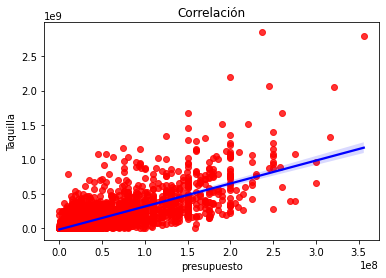

In [31]:
#Agregar línea de color azul

sns.regplot(x="budget", y="gross",  data=dataframe, scatter_kws={"color": "red"}, line_kws={"color": "blue"}).set(title='Correlación', xlabel='presupuesto', ylabel='Taquilla')


In [17]:
#Ver la correlación
#Se utiliza el método pearson por default

dataframe.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


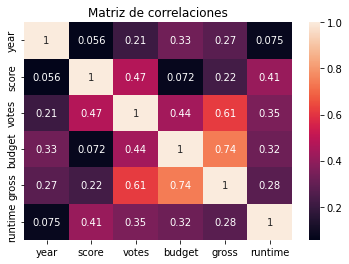

In [35]:
correlation_cuadro = dataframe.corr()

sns.heatmap(correlation_cuadro, annot = True)

plt.title("Matriz de correlaciones")

plt.show()

In [ ]:
#Sí hay una correlación entre el presupuesto y la recaudación

In [30]:
#Ordenar la data para ver las películas con más presupuesto

dataframe.sort_values(by=['budget'], ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
7075,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,2017,"December 15, 2017 (United States)",7.0,581000.0,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000,1332698830,Walt Disney Pictures,152.0,2017
7066,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",6.1,418000.0,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000,657926987,Warner Bros.,120.0,2017
5060,Pirates of the Caribbean: at World's End,PG-13,Action,2007,"May 25, 2007 (United States)",7.1,608000.0,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000,960996492,Walt Disney Pictures,169.0,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,The Living End,Unrated,Comedy,1992,"August 21, 1992 (United States)",6.5,2900.0,Gregg Araki,Gregg Araki,Mike Dytri,United States,22769,692585,Desperate Pictures,81.0,1992
5114,Paranormal Activity,R,Horror,2007,"October 16, 2009 (United States)",6.3,225000.0,Oren Peli,Oren Peli,Katie Featherston,United States,15000,193355800,Solana Films,86.0,2009
2093,El Mariachi,R,Action,1992,"February 26, 1993 (United States)",6.9,64000.0,Robert Rodriguez,Robert Rodriguez,Carlos Gallardo,Mexico,7000,2040920,Columbia Pictures,81.0,1993
4507,Primer,PG-13,Drama,2004,"May 27, 2005 (Spain)",6.9,101000.0,Shane Carruth,Shane Carruth,Shane Carruth,United States,7000,545436,ERBP,77.0,2005


In [31]:
#Conclusiones 

#Hay una correlación entre el presupuesto y la recaudación en taquilla de una película.
#Warner Bros es la compañía que más recaudación ha tenido en taquilla en las últimas 4 décadas
#Las películas de acción tienden a ser las más éxitosas
#El director con más éxito en taquilla no necesariamente surge a partir de una sola película éxitosa. Constancia.
#No hay mujeres en el TOP 10 de estrellas taquilleras. ¿Cuál es el criterio de “star” que usa esta base de datos?
#Los números de la saga de películas Avengers tiene un peso en los resultados de este análisis


